# Example notebook for the functions contained in cry_convert.py

### CRYSTAL <-> pymatgen

### cry_out2pmg function

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output
from CRYSTALpytools.convert import cry_out2pmg

ModuleNotFoundError: No module named 'units'

In [3]:
cry_output = Crystal_output()
cry_output.read_cry_output('data/mgo_optgeom.out')
pmg_structure = cry_out2pmg(cry_output,initial=False)
pmg_structure.lattice.matrix
print(type(pmg_structure))

<class 'pymatgen.core.structure.Structure'>


### cry_gui2pmg function

In [3]:
from CRYSTALpytools.crystal_io import Crystal_output, Crystal_gui
from CRYSTALpytools.convert import cry_gui2pmg

In [4]:
gui_object = Crystal_gui()
gui_object.read_cry_gui('data/mgo.gui')

mgo_pmg = cry_gui2pmg(gui_object)

mgo_pmg.cart_coords

array([[0.        , 0.        , 0.        ],
       [2.12011001, 2.12011001, 2.12011001]])

### cry_pmg2gui function

In [5]:
from pymatgen.core.surface import Structure, Lattice
from CRYSTALpytools.convert import cry_pmg2gui
from CRYSTALpytools.crystal_io import write_crystal_gui

lattice = Lattice.cubic(3.)
mgo_pmg_obj = Structure(lattice, ["Mg", "O"],
               [[0,0,0], [.5,.5,.5]])

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
mgo_gui = cry_pmg2gui(mgo_pmg_obj, symmetry=True)
write_crystal_gui('data/mgo_gui_from_pmg.gui',mgo_gui)

### cry_bands2pmg function

In [7]:
from CRYSTALpytools.crystal_io import Crystal_output, Properties_output
from CRYSTALpytools.convert import cry_bands2pmg

#### Read the band file and convert to a pymatgen object

In [8]:
cry_output = Crystal_output()
cry_output.read_cry_output('data/mgo_optgeom.out')

cry_bands = Properties_output().read_cry_bands('data/mgo_BAND_dat.BAND')
bs = cry_bands2pmg(cry_output,cry_bands,labels=['\\Gamma','B','C','\\Gamma','E'])

#### Plot the bands

<module 'matplotlib.pyplot' from '/Users/brunocamino/miniconda3/envs/test_env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

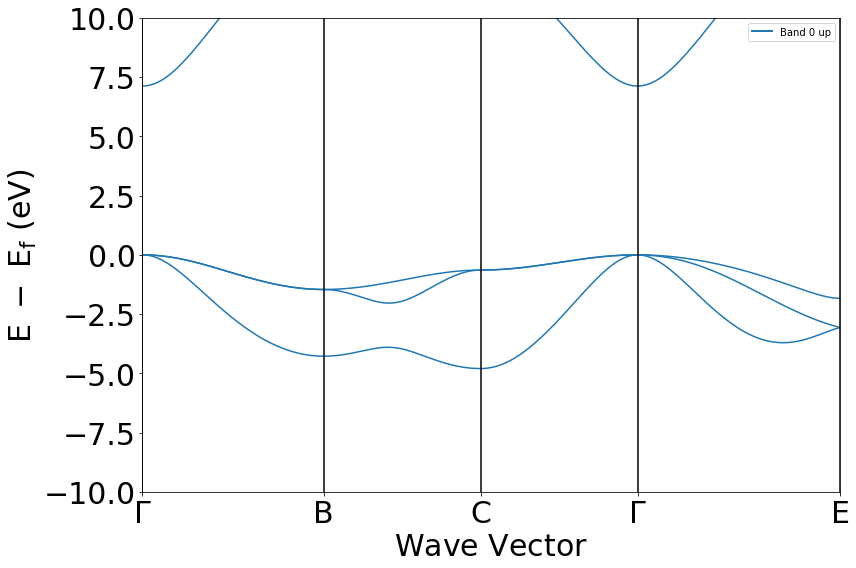

In [9]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import BSPlotter
bsplot = BSPlotter(bs)

bsplot.get_plot(ylim=(-10, 10), zero_to_efermi=True)

### CRYSTAL <-> ASE

### cry_gui2ase function

In [10]:
from CRYSTALpytools.crystal_io import Crystal_gui
from CRYSTALpytools.convert import cry_gui2ase

mgo_gui = Crystal_gui()
mgo_gui.read_cry_gui('data/mgo_optgeom.gui')
mgo_ase = cry_gui2ase(mgo_gui)
mgo_ase

Atoms(symbols='MgO', pbc=True, cell=[[0.0, 2.12011000819, 2.12011000819], [2.12011000819, 0.0, 2.12011000819], [2.12011000819, 2.12011000819, 0.0]])

### cry_ase2gui function

In [11]:
from CRYSTALpytools.crystal_io import write_crystal_gui
from CRYSTALpytools.convert import cry_ase2gui

from ase.build import bulk

copper_ase = bulk('Cu', 'fcc', a=3.6)

copper_gui = cry_ase2gui(copper_ase, symmetry=True)
write_crystal_gui('data/copper_from_ase.gui',copper_gui)

### cry_out2gui function

In [12]:
from CRYSTALpytools.crystal_io import Crystal_output
from CRYSTALpytools.convert import cry_out2ase

mgo_out = Crystal_output()
mgo_out.read_cry_output('data/mgo_optgeom.out')
mgo_ase = cry_out2ase(mgo_out)
mgo_ase

Atoms(symbols='MgO', pbc=True, cell=[[0.0, 2.12011000819, 2.12011000819], [2.12011000819, 0.0, 2.12011000819], [2.12011000819, 2.12011000819, 0.0]])

## Saving structure files (.cif and .xyz)

### cry_gui2cif function

In [13]:
from CRYSTALpytools.crystal_io import Crystal_gui
from CRYSTALpytools.convert import cry_gui2cif

mgo_gui = Crystal_gui()
mgo_gui.read_cry_gui('data/mgo_optgeom.gui')
cif_file_name = 'data/mgo_optgeom.cif'
cry_gui2cif(cif_file_name,mgo_gui)

In [14]:
! cat data/mgo_optgeom.cif

# generated using pymatgen
data_MgO
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   2.99828833
_cell_length_b   2.99828833
_cell_length_c   2.99828833
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   MgO
_chemical_formula_sum   'Mg1 O1'
_cell_volume   19.05922268
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Mg  Mg0  1  0.00000000  0.00000000  0.00000000  1
  O  O1  1  -0.50000000  -0.50000000  -0.50000000  1


### cry_out2cif function

In [15]:
from CRYSTALpytools.crystal_io import Crystal_output
from CRYSTALpytools.convert import cry_gui2cif

mgo_out = Crystal_output()
mgo_out.read_cry_output('data/mgo_optgeom.out')
cif_file_name = 'data/mgo_optgeom.cif'
cry_gui2cif(cif_file_name,mgo_gui)